In [51]:
!pip install tensorflow opencv-python matplotlib

In [52]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
anyio                        4.3.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.7.1
asttokens                    2.4.1
astunparse                   1.6.3
async-generator              1.10
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.15.0
beautifulsoup4               4.12.3
bleach                       6.1.0
certifi                      2023.5.7
cffi                         1.15.1
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
defusedxml                   0.7.1
distlib                      0.3.6
Django                       4.2.1


In [53]:
import tensorflow as tf 
import os

In [54]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [55]:
data_dir='data'

In [56]:
image_exts = ['jpeg','jpg','bmp','png']
image_exts[2]
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)


03 - Copy (2).jpg
1-s2.0-S2667147623000092-gr5.jpg
10147tn - Copy (2).jpg
12903_2021_1738_Fig1_HTML - Copy (2).jpg
13244_2018_644_Fig1_HTML - Copy (2).png
3-Figure1-1.png
3-Figure4-1.png
3.19_kyste1 - Copy (2).png
3.19_kyste2.jpg
335073 - Copy (2).png
33554631_m.jpg
371eeb7ba2d8dc7a348f95e3fa2d58_gallery - Copy (2).jpg
462947_1_En_27_Fig18_HTML - Copy (2).png
462947_1_En_27_Fig9_HTML - Copy (2).png
51ed99a8665aefc298c5fe334112a7_big_gallery - Copy (2).jpg
679 - Copy (2).jpg
679.jpg
9sc555AqrYZrTN4A0hDCsw.jpg
ABC_12-989x686-1 - Copy (2).png
ABC_22-600x389-1 - Copy (2).png
Abscessed_tooth_periapical_radiograph.jpg
ca - Copy (2).jpg
Capture.PNG
cene-kistleri-tedavisi-370x265 - Copy (2).jpg
Chronic_apical_periodontitis - Copy (2).jpg
cyst-radiograf - Copy (2).jpg
cyst-tumour.jpg
cyst.JPG - Copy (2).jpg
Dental-Cysts - Copy (2).png
Dental-Cysts2 - Copy (2).jpg
dentigerous_cyst - Copy (2).jpg
denu-2015-42-6-548_f06 - Copy (2).jpg
diagnostics-12-02006-g001 - Copy (2).png
e736fa1af6c9dce203afcd

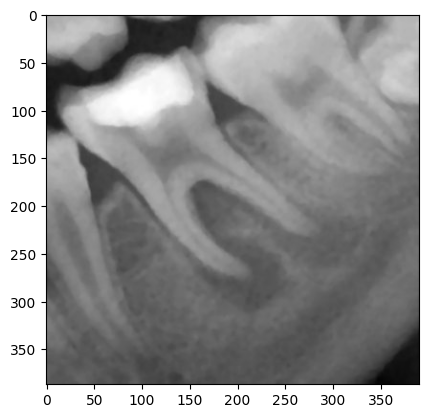

In [57]:
img= cv2.imread(os.path.join('data','Infection','granulome.jpg'))
img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [58]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            

In [59]:
 import numpy as np


In [60]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 156 files belonging to 2 classes.


In [61]:
data_iterator= data.as_numpy_iterator()

In [62]:
batch=data_iterator.next()

In [63]:
batch[1]

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [64]:
batch[0].shape

(32, 256, 256, 3)

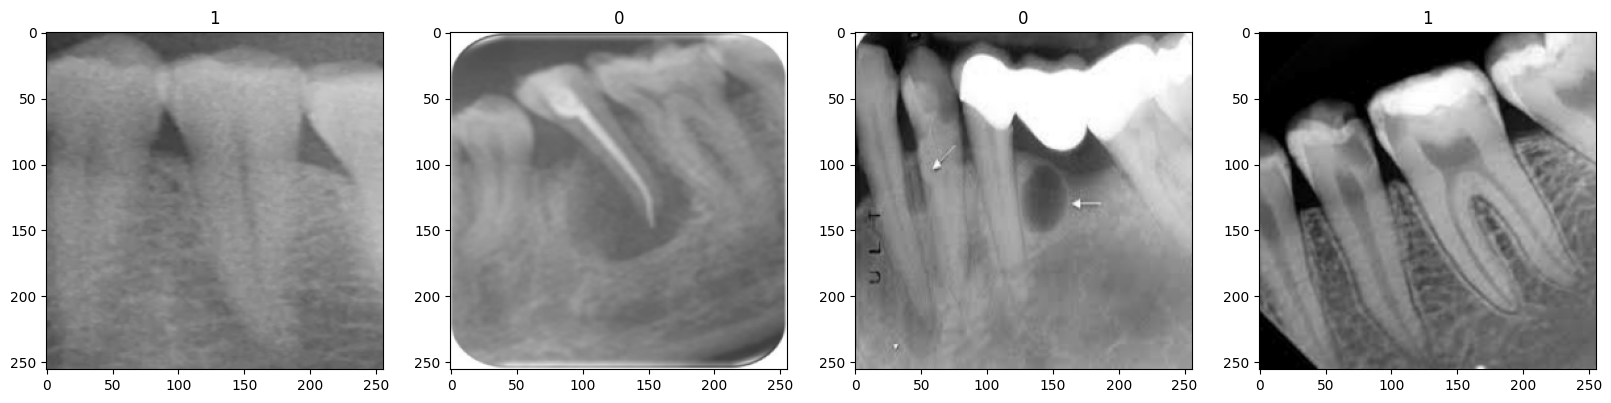

In [65]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [66]:
data = data.map(lambda x , y :(x/255,y))

In [67]:
scaled_iterator= data.as_numpy_iterator()

In [68]:
batch = scaled_iterator.next()

In [69]:
batch[0].max()

1.0

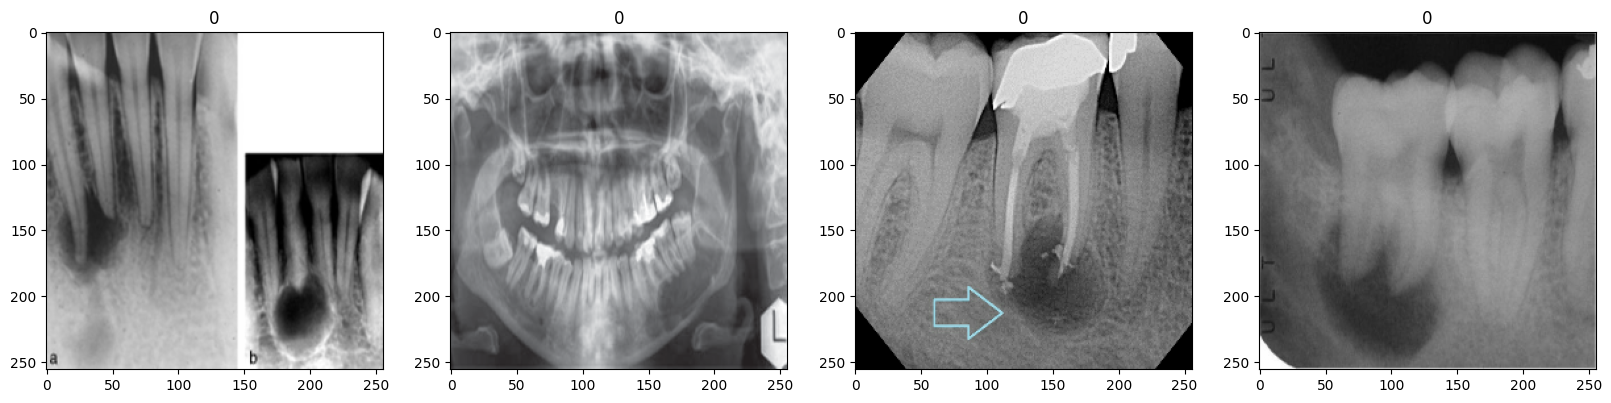

In [70]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [71]:
train_size = int(len(data)*.7)
val_size= int(len(data)*.2)+1
test_size= int(len(data)*.1)+1

In [72]:
train = data.take(train_size)
val=data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten , Dropout


In [74]:
model= Sequential()


In [75]:
model.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape=(256,256,3)))
model.add(MaxPooling2D()) 

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [76]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
logdir='logs'

In [79]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [80]:
hist= model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 0.5339 - loss: 0.8026 - val_accuracy: 0.4500 - val_loss: 0.6810
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.4635 - loss: 0.7255 - val_accuracy: 0.5667 - val_loss: 0.6967
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 0.5391 - loss: 0.7100 - val_accuracy: 0.7167 - val_loss: 0.6397
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.8203 - loss: 0.6153 - val_accuracy: 0.5000 - val_loss: 0.8305
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.7044 - loss: 0.5745 - val_accuracy: 0.7333 - val_loss: 0.5585
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.7188 - loss: 0.5795 - val_accuracy: 0.8333 - val_loss: 0.4633
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - accuracy: 0.8164 - loss: 0.4490 - val_accuracy: 0.8167 - val_loss: 0.4755
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.8333 - loss: 0.4031 - val_accuracy: 0.8000 - val_loss:

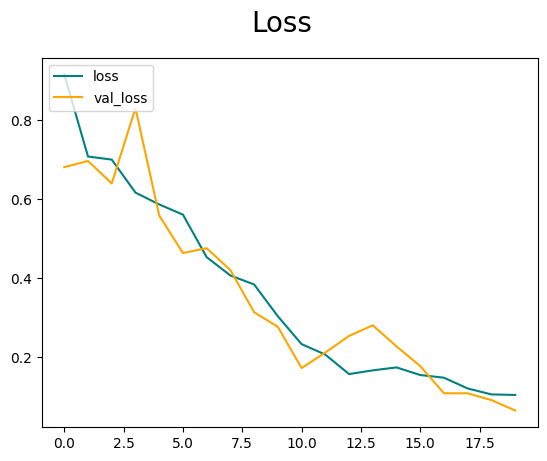

In [81]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

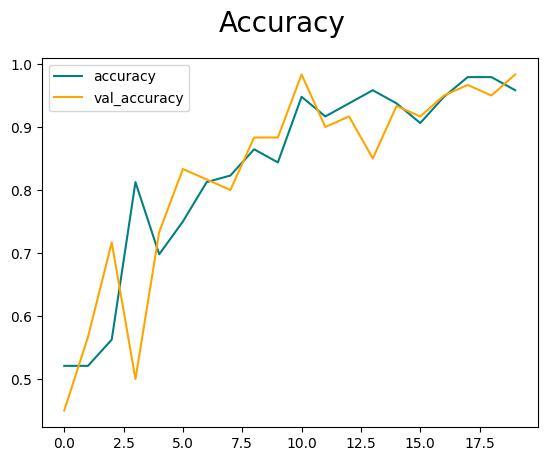

In [82]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [83]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [84]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [85]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [86]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [87]:
import cv2


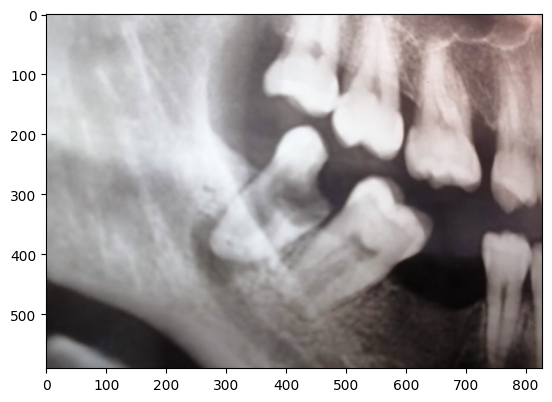

In [88]:
img = cv2.imread('infectiontest.jpg')
plt.imshow(img)
plt.show()

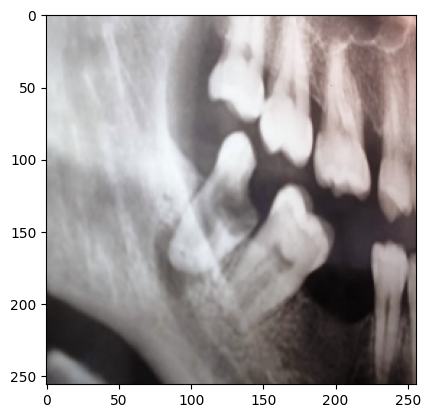

In [89]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [90]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [91]:
yhat


array([[0.00262408]], dtype=float32)

In [92]:
if yhat > 0.5: 
    print(f'Predicted class no infection')
else:
    print(f'Predicted class is infection')

Predicted class is infection


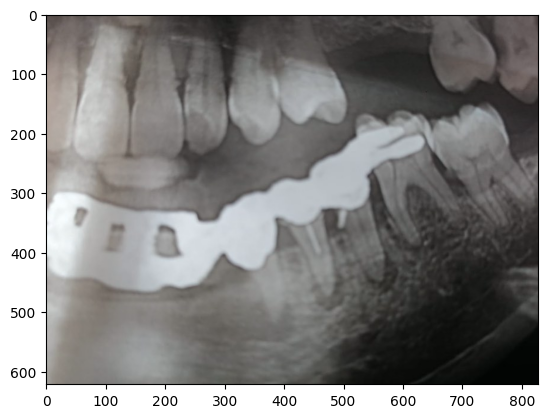

In [93]:
img = cv2.imread('infectiontest2.jpg')
plt.imshow(img)
plt.show()

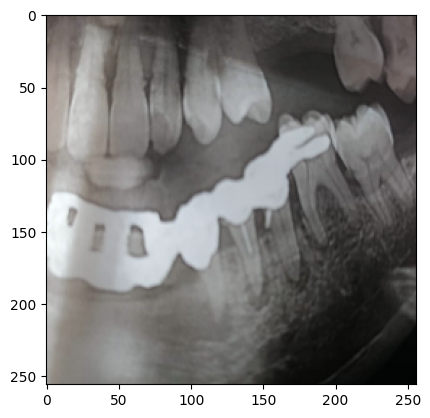

In [94]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [95]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [96]:
yhat


array([[0.19744375]], dtype=float32)

In [97]:
if yhat > 0.5: 
    print(f'Predicted class no infection')
else:
    print(f'Predicted class is infection')

Predicted class is infection


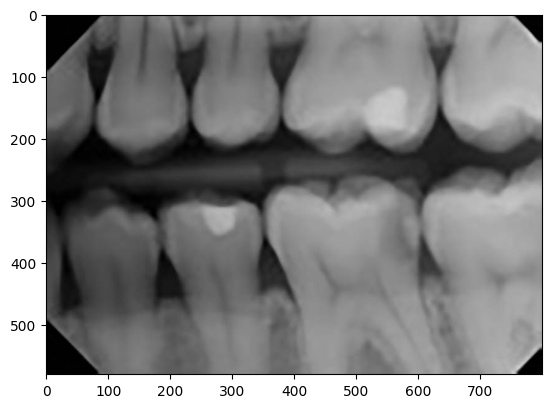

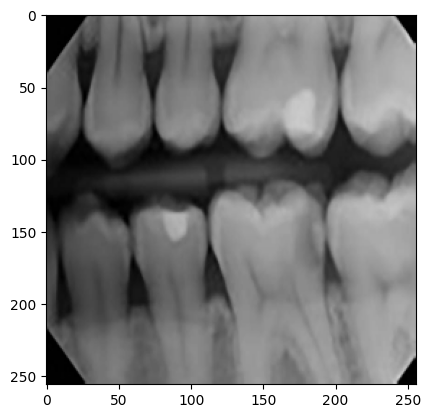

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [98]:
img = cv2.imread('noinfectiontest.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))


In [99]:
yhat



array([[0.9911856]], dtype=float32)

In [100]:
if yhat > 0.5: 
    print(f'Predicted class no infection')
else:
    print(f'Predicted class is infection')

Predicted class no infection
